In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from sklearn.metrics import mean_absolute_error
os.chdir('/'.join(os.getcwd().split('/')[:-2]))
from src.utils.io import load, save
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
def build_model(targets):
    estimates = targets.copy(deep=True)
    estimates.iloc[:,1] = estimates.iloc[:,1].shift(1)
    estimates.iloc[0,1] = estimates.iloc[1,1]
#     targets.set_index('Date', inplace=True)
#     estimates.set_index('Date', inplace=True)
#     estimates.index = targets.index
#     estimates.drop('Date', axis=1, inplace=True)
    return estimates, targets

In [3]:
def plot_predictions_vs_targets(predictions, targets, test_size):
    plt.figure(figsize=(24,8))
    predictions = predictions.iloc[-test_size:,1]
    targets = targets.iloc[-test_size:,1]
    plt.plot(targets)
    plt.plot(predictions)
    plt.title("Tesla's daily closing stock price")
    plt.xlabel('Time index')
    plt.ylabel('USD')
    plt.legend(['Target', 'Predicted'])
    plt.show()

In [4]:
targets = load('data/processed/targets.pickle')

In [5]:
predictions, targets = build_model(targets)
test_size = int(predictions.shape[0]*0.1)

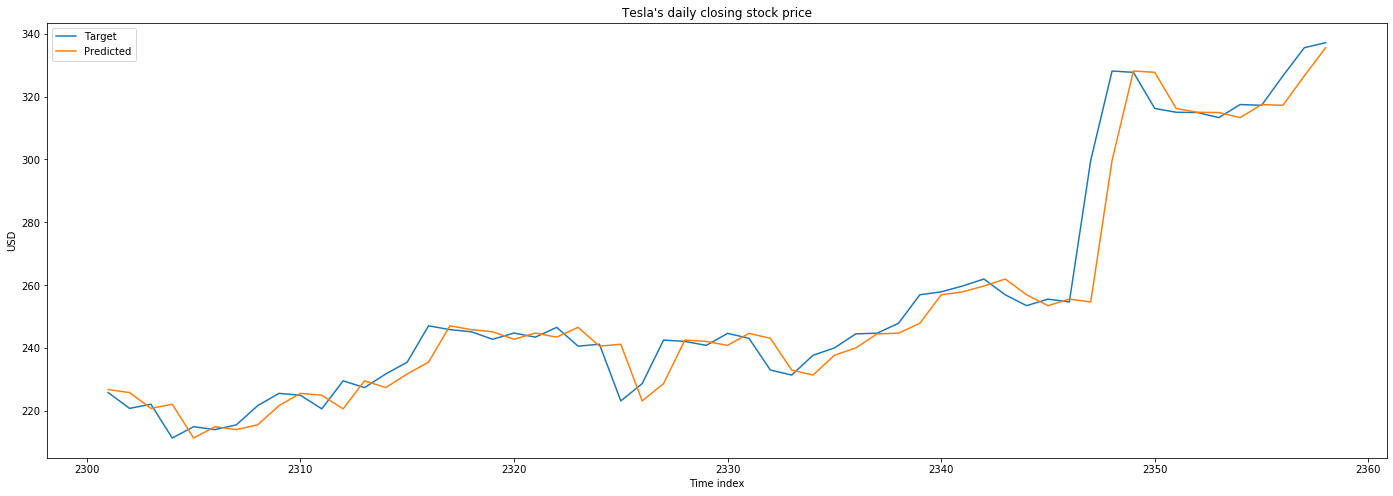

In [6]:
plot_predictions_vs_targets(predictions, targets, 58)

In [7]:
print('MAE: ', mean_absolute_error(targets.iloc[-test_size:,1], predictions.iloc[-test_size:,1]))

MAE:  6.0384680851063814


In [8]:
def calculate_accuracy(targets, predictions):
    price_pred = pd.concat([pd.DataFrame(data=predictions, columns=['predictions']).pct_change()
                            , pd.DataFrame(data=targets, columns=['targets']).pct_change()], axis=1)
    price_pred.dropna(inplace=True)

    price_pred['acc'] = np.where(np.sign(price_pred['predictions']) == np.sign(price_pred['targets']), 1, 0)
    return price_pred['acc'].sum() / price_pred['acc'].count()

In [9]:
acc = calculate_accuracy(targets.values[-test_size:,1], predictions.values[-test_size:,1])

print(f"Accuracy: {round(acc * 100,2)}%")

Accuracy: 47.86%
